In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-accidents/US_Accidents_March23.csv


# US Accidents Exploratory Data Analysis


- This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data.
- The data is available on Kaggle at https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
- The dataset currently contains approximately 7.7 million accident records.
- The data columns include varying columns as :
    - state, country, city, street ( for location analysis)
    - start_time, end_time, timezone (for time based analysis)
    - weather, wind chill, humidity ( for weather based analysis)
    - source (from where data is obtained)
- The analysis on this dataset can be used for numerous applications such as 
    - real-time car accident prediction, 
    - studying car accident hotspot locations, 
    - casualty analysis, extracting cause and effect rules to predict car accidents,
    - studying the impact of precipitation or other environmental stimuli on accident occurrence. 
    - The most recent release of the dataset can also be useful for studying the impact of COVID-19 on traffic behavior and accidents.

## Data Preparation and Cleaning
- Load the file using pandas
- Look at some information about the data and the columns
- Fix any missing or incorrect values

In [3]:
data_filename = '/kaggle/input/us-accidents/US_Accidents_March23.csv'
df = pd.read_csv(data_filename)

In [4]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.shape

(7728394, 46)

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
numeric_cols = df.select_dtypes(include=['number'])
len(numeric_cols.columns)

13

### Proportion of missing values

In [9]:
missing_percentages = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [10]:
missing_percentages[missing_percentages != 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

<Axes: >

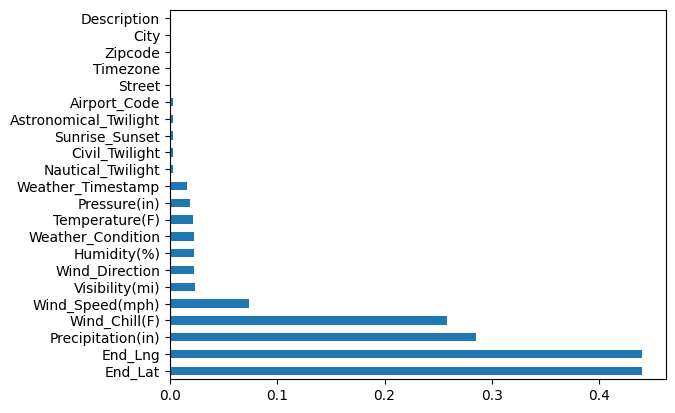

In [11]:
missing_percentages[missing_percentages != 0].plot(kind = 'barh')

### Remove Columns that we dont want to use (which are missing in half or more than half of the rows)
Like End_Lng and End_Lat

In [12]:
df.drop(missing_percentages[missing_percentages > 0.4].index, axis=1, inplace = True)

## Exploratory Analysis and Visualization

Columns we'll analyze:
1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

### City

In [13]:
cities = df.City.unique()
len(cities)

13679

**Top 10 cities where accidents have occurred**

Noticed that most populous city New York is not in top 10 cities. This is questionable!

In [14]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:10]

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Orlando        109733
Austin          97359
Raleigh         86079
Nashville       72930
Baton Rouge     71588
Name: count, dtype: int64

In [15]:
'New York' in df.City.unique()



True

In [42]:
'NY' in df.State

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64

**Barplot of Top 20 cities with most accidents**

<Axes: ylabel='City'>

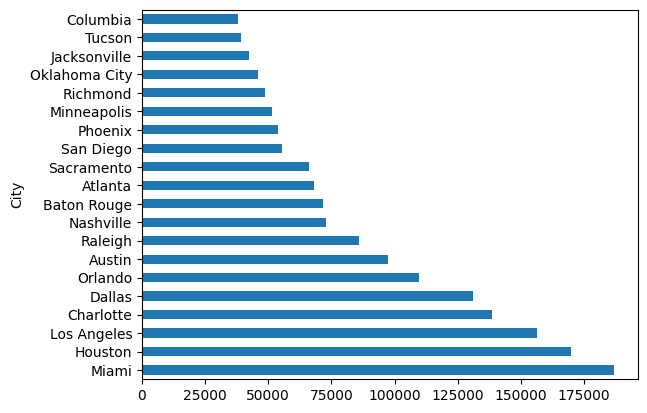

In [17]:
cities_by_accident[:20].plot(kind = 'barh')

In [60]:
# States with most number of accidents


states_by_accident = df.State.value_counts()
states_by_accident[:10]

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64

**Plotting distplot for checking density**



In [18]:
import seaborn as sns
sns.set_style('darkgrid')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

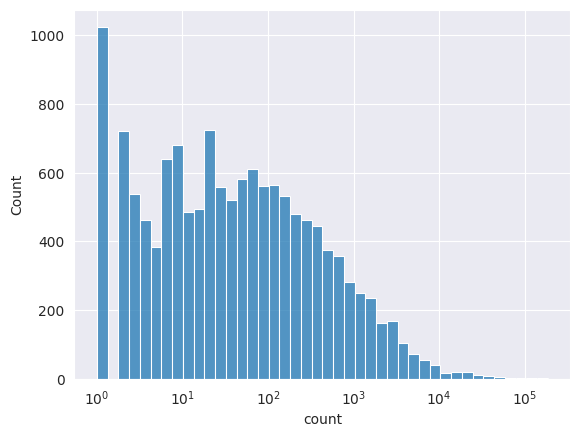

In [19]:
sns.histplot(cities_by_accident, log_scale = True)

In [63]:
cities_by_accident[cities_by_accident == 1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

In [21]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [22]:
len(high_accident_cities) / len(cities)

0.08904159660793917

In [68]:
def city_cases_percentage(val, operator):
    if operator == '<':
        res = cities_by_accident[cities_by_accident<val].shape[0]
    elif operator == '>':
        res = cities_by_accident[cities_by_accident>val].shape[0]
    elif operator == '=':
        res = cities_by_accident[cities_by_accident==val].shape[0]
    print(f'{res} Cities, {round(res*100/city_df.shape[0], 2)}%')
    
    
city_cases_percentage(1, '=')
city_cases_percentage(100, '<')
city_cases_percentage(1000, '<')
city_cases_percentage(1000, '>')
city_cases_percentage(5000, '>')
city_cases_percentage(10000, '>')

1023 Cities, 7.48%
8947 Cities, 65.41%
12460 Cities, 91.1%
1215 Cities, 8.88%
231 Cities, 1.69%
105 Cities, 0.77%


### Start Time

In [23]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time, errors='coerce')
#If you're using Pandas and the formats are mixed or inconsistent, 
#you can use pd.to_datetime with errors='coerce' to convert invalid parsing to NaT (Not a Time).

In [25]:
df.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

#### To get the hour part

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = True, norm_hist = True)


NameError: name 'sns' is not defined

- A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work). It can be due to traffic at that time. Lets find out!
- Next highest percentage of accidents is between 3pm to 6pm.

#### To get day of week

/tmp/ipykernel_33/2109857932.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True)


<Axes: xlabel='Start_Time'>

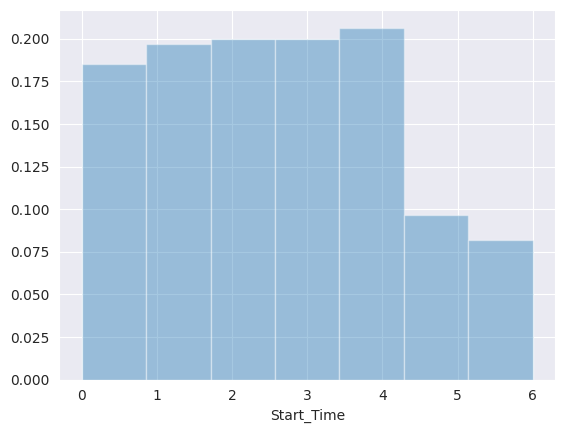

In [ ]:
sns.displot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True)


- There are more number of accidents on weekdays as compared to weekends.

#### Now the thing to ponder is that "Is the distribution of accidents by hour weekdays is same as on weekends ?"

/tmp/ipykernel_33/3341704002.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)


<Axes: xlabel='Start_Time'>

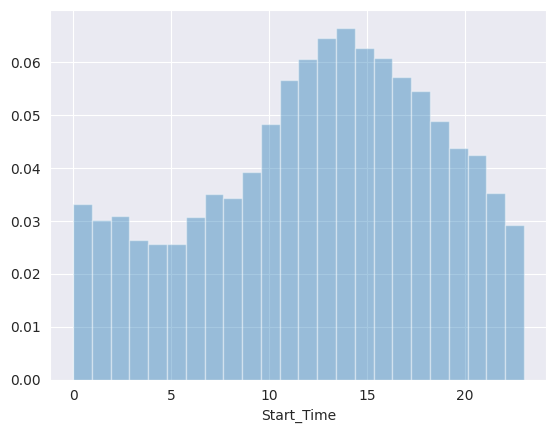

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.displot(sundays_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)

/tmp/ipykernel_33/4106657993.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saturdays_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)


<Axes: xlabel='Start_Time'>

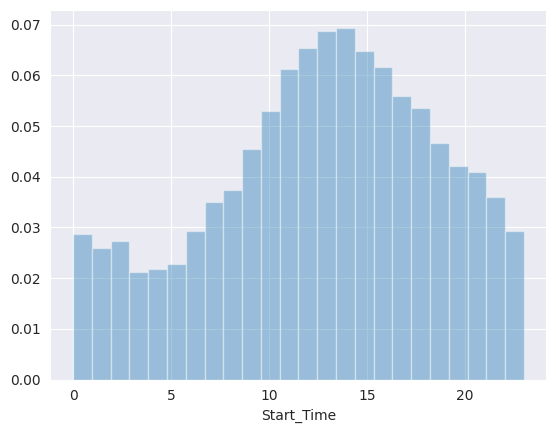

In [ ]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.displot(saturdays_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)

/tmp/ipykernel_33/1425569934.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mondays_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)


<Axes: xlabel='Start_Time'>

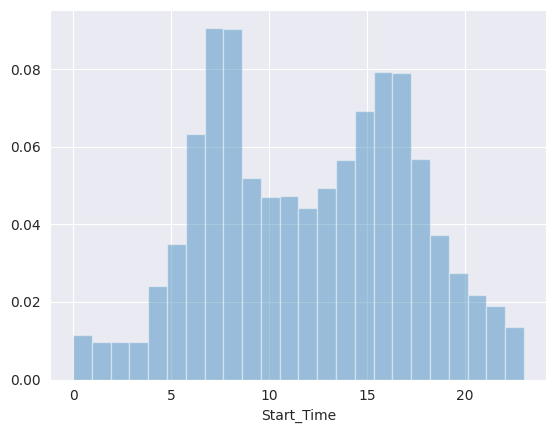

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.displot(mondays_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)

- On  sundays the peak occur between 10 am to 3pm unlike weekdays.

/tmp/ipykernel_33/2506545165.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mondays_start_time.dt.month, bins = 12, kde = False, norm_hist = True)


<Axes: xlabel='Start_Time'>

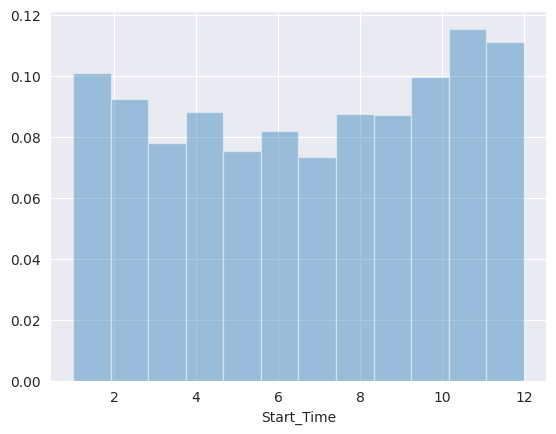

In [ ]:
sns.displot(mondays_start_time.dt.month, bins = 12, kde = False, norm_hist = True)

In [32]:
df.Source.unique()

array(['Source2', 'Source3', 'Source1'], dtype=object)

/tmp/ipykernel_33/3218967837.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2021_Source1.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)


<Axes: xlabel='Start_Time'>

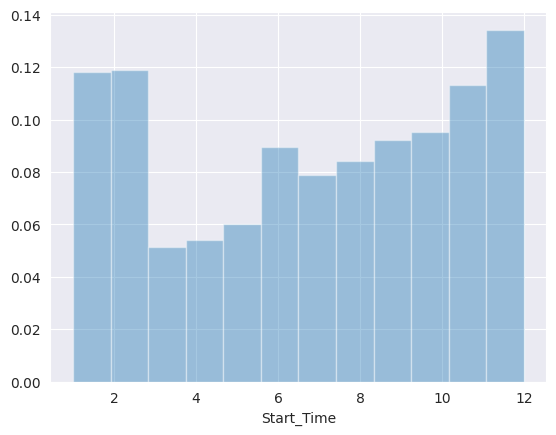

In [ ]:
df_2021 = df[df.Start_Time.dt.year == 2021]
df_2021_Source1 = df_2021[df_2021.Source == 'Source1']
sns.displot(df_2021_Source1.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

- Can you explain the month wise trend of accidents ?

Much data is missing for 2016 and maybe 2017 also.
There seems to be some issue with source1 and source3

<Axes: ylabel='count'>

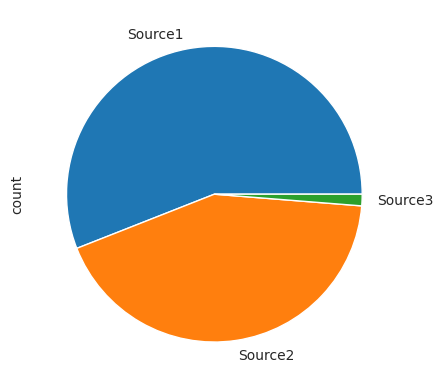

In [34]:
df.Source.value_counts().plot(kind = 'pie')

- The data point from different sources are approximately same in number.

### Start Latitude and Longitude

In [35]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [36]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

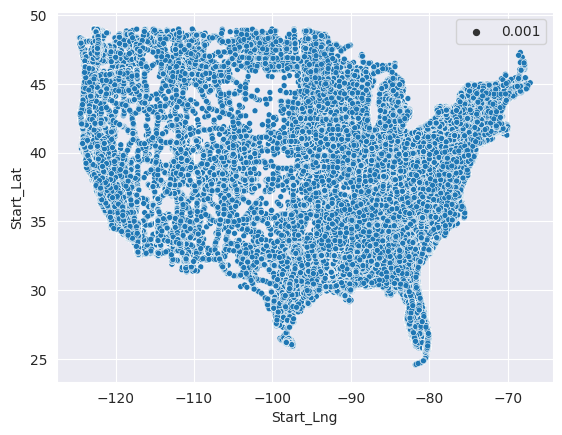

In [37]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, size=0.001)

#### Plot data points on Heatmap

In [38]:
import folium
from folium.plugins import HeatMap

In [39]:
sample_df = df.sample(int(0.01 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [40]:
map = folium.Map()
HeatMap(lat_lon_pairs[:100]).add_to(map)
map

Things can be explored in heatmap
- Can choose colors
- As accidents follow logarithmic pattern then we can try plotting heatmaps for logarithmic instead of linear.

## Summary and Conclusion

**Insights :**
- In this Dataset, we have the records of total 13,679 Cities.
- Miami is the city with highest number of accidents.
- Data is present for New York but its not in top cities with most number of accidents inspite of being most populous. It could be because new york data is not collected from inital years. 
- In US, California is the state with highest no. of road accidents
- The number of accidents per city decreases exponentially
- Less than 8% of cities have more than 1000 yearly accidents.
- Over 1000 cities reported just one accident (need to investigate)
- Most cities have less than 2000 accidents, which is good!
- 7.4% (1167 Cities) cities in US, have only 1 accident record in past 5 years.
- Around 65% (8,682 Cities) of all cities in US, have less than 100 total no. of road accidents.
- 91% (10,406 Cities) cities in US, have the road accident records (2016-2020), less than 1,000.
- There are 1215 Cities (8.88%) in US, which have more than 1,000 total no. of road accidents in past 5 years.
- 231 Cities (1.69%) in US, have more than 5,000 road accident records.
- Only 105 Cities (0.77%) in US, have more than 10,000 road accident records.
- A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work). It can be due to traffic at that time. Lets find out!
- Next highest percentage of accidents is between 3pm to 6pm.
- There are more number of accidents on weekdays as compared to weekends.
- On sundays the peak occur between 10 am to 3pm unlike weekdays.

## Ask and Answer questions
1. Are there more accidents in warmer or colder areas ?
2. Which 5 states have the highest number of accidents ? How about per capita ?
3. Does New York show up in the data ? If yes, why is the count lower if this is the most populated city ?
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently?
5. What time of the day are the accidents most frequently in ?
6. Which days of the week have the most accidents.
7. Which months have the most accidents ?
8. What is the trend of accidents year over year (decreasing / increasing) ?
9. When is accidents per unit the traffic is the highest ?


## Some key points to complete this notebook
- For answering above questions, write the approach, code it out and draw graph if any.
- Add the future scope of this project, future ideas on which we can work on. Eg : We can do state analysis, seasonal analysis for this project. So that we can have the other dimensions on which this project can be extended. Just briefly explain this.

## Some user questions
1. What to do if there are plenty of zeroes in the column ? Should we remove the column or should we remove the rows ?

Ans1. It depends on the case. Suppose if city has plenty of zeroes, and we are geographical analysis, then we should remove the certain rows which have city as empty. And if we are time based analysis then we dont need to remove the rows.